<a href="https://colab.research.google.com/github/rettygeorge/rettygeorge.github.io/blob/master/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Retty George
1002021016
Final Project - Natural Image Classifier

In [1]:
!unzip '/content/archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: natural_images/cat/cat_0204.jpg  
  inflating: natural_images/cat/cat_0205.jpg  
  inflating: natural_images/cat/cat_0206.jpg  
  inflating: natural_images/cat/cat_0207.jpg  
  inflating: natural_images/cat/cat_0208.jpg  
  inflating: natural_images/cat/cat_0209.jpg  
  inflating: natural_images/cat/cat_0210.jpg  
  inflating: natural_images/cat/cat_0211.jpg  
  inflating: natural_images/cat/cat_0212.jpg  
  inflating: natural_images/cat/cat_0213.jpg  
  inflating: natural_images/cat/cat_0214.jpg  
  inflating: natural_images/cat/cat_0215.jpg  
  inflating: natural_images/cat/cat_0216.jpg  
  inflating: natural_images/cat/cat_0217.jpg  
  inflating: natural_images/cat/cat_0218.jpg  
  inflating: natural_images/cat/cat_0219.jpg  
  inflating: natural_images/cat/cat_0220.jpg  
  inflating: natural_images/cat/cat_0221.jpg  
  inflating: natural_images/cat/cat_0222.jpg  
  inflating: natural_images/cat/cat_0223.jpg  
  inflati

In [2]:
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.python.keras import regularizers
from keras import optimizers, metrics, models

from keras.layers import Dense, Conv2D, Flatten, Activation, MaxPooling2D, Dropout

In [3]:
data_dir ='/content/natural_images'

In [4]:
print(os.listdir('/content/natural_images'))

['dog', 'flower', 'person', 'motorbike', 'car', 'cat', 'airplane', 'fruit']


In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
train_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6899 files belonging to 8 classes.
Using 5520 files for training.


In [7]:
val_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6899 files belonging to 8 classes.
Using 1379 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


Intital Model

In [ ]:
# 1-initial model
num_classes = 8
model = Sequential([
  layers.Dense(10, activation='relu'),
  layers.Flatten(),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# 1-initial model training
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
173/173 [==============================] - 27s 154ms/step - loss: 18.9360 - accuracy: 0.9179 - val_loss: 131.6003 - val_accuracy: 0.7716
Epoch 2/10
173/173 [==============================] - 27s 154ms/step - loss: 19.3254 - accuracy: 0.9167 - val_loss: 98.9290 - val_accuracy: 0.7766
Epoch 3/10
173/173 [==============================] - 27s 154ms/step - loss: 17.8375 - accuracy: 0.9185 - val_loss: 100.8714 - val_accuracy: 0.7810
Epoch 4/10
173/173 [==============================] - 27s 154ms/step - loss: 9.2909 - accuracy: 0.9440 - val_loss: 115.2851 - val_accuracy: 0.7694
Epoch 5/10
173/173 [==============================] - 27s 154ms/step - loss: 9.9171 - accuracy: 0.9433 - val_loss: 110.4466 - val_accuracy: 0.7890
Epoch 6/10
173/173 [==============================] - 27s 154ms/step - loss: 14.8864 - accuracy: 0.9257 - val_loss: 100.2389 - val_accuracy: 0.8006
Epoch 7/10
173/173 [==============================] - 27s 154ms/step - loss: 12.4892 - accuracy: 0.9330 - val_loss:

In [ ]:
# 1-initial model accuracy
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

print('\nTest accuracy:', test_acc)

44/44 - 3s - loss: 117.1556 - accuracy: 0.7607 - 3s/epoch - 63ms/step

Test accuracy: 0.7606961727142334


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


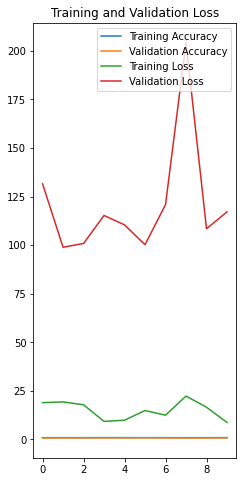

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

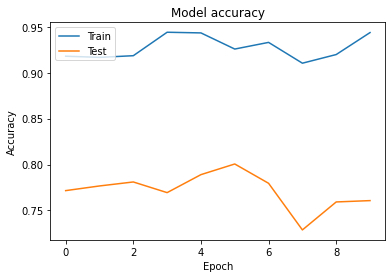

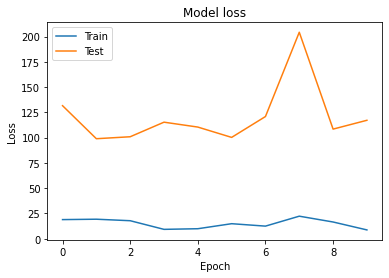

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Model to Prevent Overfitting**

In [ ]:
# To prevent overfitting
num_classes = 8
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Dense(10, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(num_classes,kernel_regularizer=regularizers.l2(0.001)),
  layers.Dropout(0.5),
])

In [ ]:
# Compiling after overfitting prevention
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Training after overfitting prevention
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
173/173 [==============================] - 48s 271ms/step - loss: 11.8114 - accuracy: 0.3567 - val_loss: 3.5204 - val_accuracy: 0.6672
Epoch 2/10
173/173 [==============================] - 47s 269ms/step - loss: 4.0428 - accuracy: 0.4433 - val_loss: 2.3087 - val_accuracy: 0.7230
Epoch 3/10
173/173 [==============================] - 47s 270ms/step - loss: 2.6424 - accuracy: 0.4793 - val_loss: 1.5241 - val_accuracy: 0.7498
Epoch 4/10
173/173 [==============================] - 47s 269ms/step - loss: 2.0842 - accuracy: 0.4915 - val_loss: 1.2958 - val_accuracy: 0.7846
Epoch 5/10
173/173 [==============================] - 47s 269ms/step - loss: 1.6401 - accuracy: 0.5217 - val_loss: 0.9923 - val_accuracy: 0.7868
Epoch 6/10
173/173 [==============================] - 47s 269ms/step - loss: 1.4549 - accuracy: 0.5377 - val_loss: 0.9857 - val_accuracy: 0.7970
Epoch 7/10
173/173 [==============================] - 47s 269ms/step - loss: 1.3733 - accuracy: 0.5516 - val_loss: 0.9167 - val_a

In [ ]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

print('\nTest accuracy:', test_acc)

44/44 - 3s - loss: 0.9022 - accuracy: 0.7897 - 3s/epoch - 66ms/step

Test accuracy: 0.7897026538848877


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


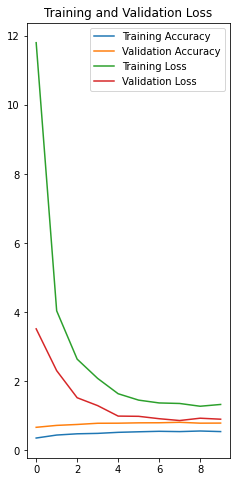

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

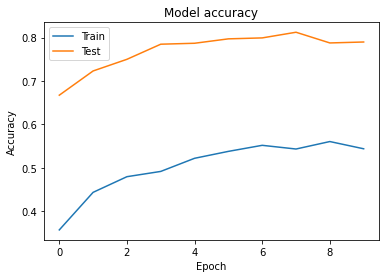

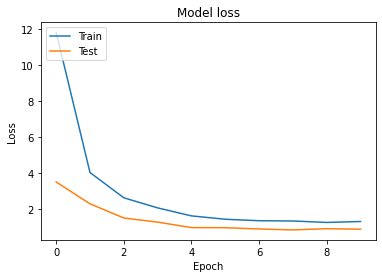

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Model with 6 Convolutional Layer**

In [15]:
model = models.Sequential()
model.add(Conv2D(32,(3,3) , padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3) , padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3) , padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(256,(3,3) , padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,(3,3) , padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Conv2D(1024,(3,3) , padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(8,activation='softmax'))

In [16]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


173/173 [==============================] - 14s 71ms/step - loss: 9.1877 - accuracy: 0.2736 - val_loss: 3.2113 - val_accuracy: 0.5054
Epoch 2/50
173/173 [==============================] - 12s 71ms/step - loss: 2.7206 - accuracy: 0.5650 - val_loss: 2.8693 - val_accuracy: 0.6004
Epoch 3/50
173/173 [==============================] - 13s 72ms/step - loss: 2.2929 - accuracy: 0.6962 - val_loss: 2.7052 - val_accuracy: 0.7063
Epoch 4/50
173/173 [==============================] - 13s 72ms/step - loss: 2.1014 - accuracy: 0.7514 - val_loss: 2.4117 - val_accuracy: 0.7252
Epoch 5/50
173/173 [==============================] - 13s 71ms/step - loss: 1.9271 - accuracy: 0.7962 - val_loss: 2.5447 - val_accuracy: 0.6041
Epoch 6/50
173/173 [==============================] - 13s 72ms/step - loss: 1.8269 - accuracy: 0.8201 - val_loss: 2.2712 - val_accuracy: 0.6788
Epoch 7/50
173/173 [==============================] - 14s 78ms/step - loss: 1.7007 - accuracy: 0.8371 - val_loss: 2.0045 - val_accuracy: 0.7846
Epo

In [18]:
# 1-initial model accuracy
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

print('\nTest accuracy:', test_acc)

44/44 - 1s - loss: 0.8342 - accuracy: 0.8941 - 1s/epoch - 34ms/step

Test accuracy: 0.8941261768341064


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


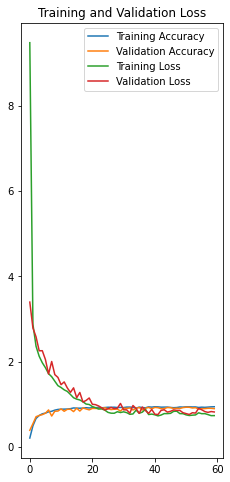

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

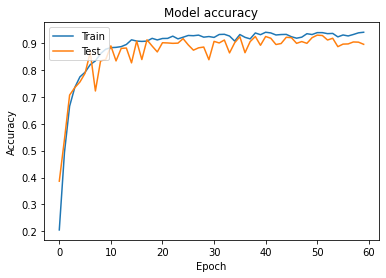

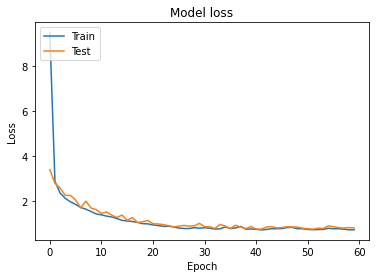

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Random Forest classifier**

In [ ]:
# Importing libraries
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras import optimizers, metrics, models
from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
# Declaring the main directory
dir = '/content/natural_images'

# Features and Labels
X = []
Y = []
labels = {}

# Extracting label string and index
for i, k in enumerate(os.listdir(dir)):
    labels[k] = i
    
# Appending features and labels
for i in os.listdir(dir):
    subdir = os.path.join(dir, i)
    for j in tqdm(os.listdir(subdir)):
        image = cv2.imread(os.path.join(subdir, j), 0)
        image = cv2.resize(image, (80, 80))
        X.append(image)
        
        Y.append(labels[i])

100%|██████████| 843/843 [00:01<00:00, 522.03it/s]


In [ ]:
# Converting to numpy arrays
X = np.array(X)
Y = np.array(Y).reshape(6899, 1)

X.shape, X.shape

((6899, 80, 80), (6899, 80, 80))

In [ ]:
X = X.reshape(-1, 70, 70, 1)

In [ ]:
Y = to_categorical(X)
Y.shape

(6899, 8)

In [ ]:
# Spliting into train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5174, 70, 70, 1), (1725, 70, 70, 1), (5174, 8), (1725, 8))

In [ ]:
n, x, y, z = x_train.shape
x_train2 = x_train.reshape((n,x*y*z))

In [ ]:
n, x, y, z = x_test.shape
x_test2 = x_test.reshape((n,x*y*z))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train2,y_train)

RandomForestClassifier()

In [ ]:
y_pred=model.predict(x_test2)
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.59      1.00      0.75       104
           1       0.51      0.95      0.66       133
           2       0.75      0.99      0.86       181
           3       0.07      0.83      0.14        18
           4       1.00      1.00      1.00       259
           5       0.51      1.00      0.68        96
           6       0.00      0.50      0.01         2
           7       0.00      0.00      0.00         0

   micro avg       0.45      0.98      0.62       793
   macro avg       0.43      0.78      0.51       793
weighted avg       0.72      0.98      0.81       793
 samples avg       0.45      0.45      0.45       793



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.fit(x_train2,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_knn=knn.predict(x_test2)
y_pred_knn

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
accuracy_score(y_pred_knn,y_test)
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       177
           1       0.30      0.90      0.45        82
           2       0.72      0.85      0.78       203
           3       0.50      0.41      0.45       246
           4       1.00      0.95      0.97       275
           5       0.49      1.00      0.66        92
           6       0.15      0.47      0.23        77
           7       0.03      0.50      0.05        10

   micro avg       0.51      0.76      0.61      1162
   macro avg       0.50      0.74      0.55      1162
weighted avg       0.67      0.76      0.69      1162
 samples avg       0.51      0.51      0.51      1162



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decison Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc=DecisionTreeClassifier()

In [ ]:
dtc.fit(x_train2,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dtc=dtc.predict(x_test2)

In [ ]:
y_pred_dtc

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
accuracy_score(y_pred_dtc,y_test)
print(classification_report(y_pred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.55      0.53      0.54       181
           1       0.60      0.64      0.62       232
           2       0.77      0.76      0.76       245
           3       0.32      0.30      0.31       214
           4       0.99      0.99      0.99       260
           5       0.61      0.60      0.61       193
           6       0.27      0.29      0.28       219
           7       0.22      0.22      0.22       181

   micro avg       0.56      0.56      0.56      1725
   macro avg       0.54      0.54      0.54      1725
weighted avg       0.56      0.56      0.56      1725
 samples avg       0.56      0.56      0.56      1725

